<a href="https://colab.research.google.com/github/Aafreen2603/deep-learning/blob/main/train_test_split_class_Scikitlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyze the use of train_test_split class of Scikitlearn library and study the effects of different ratios of Training Data and Test data on the accuracy of a model.


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
import seaborn as sns
iris = sns.load_dataset('iris')

In [ ]:
data = torch.tensor(iris[iris.columns[0:4]].values ).float()

In [ ]:
labels = torch.zeros(len(data), dtype=torch.long )
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

using train_test_split

In [ ]:
fakedata = np.tile(np.array([1,2,3,4]),(10,1)) + np.tile(10*np.arange(1,11),(4,1)).T
fakelabels = np.arange(10)>4
print(fakedata), print(' ')
print(fakelabels)

[[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 61  62  63  64]
 [ 71  72  73  74]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [101 102 103 104]]
 
[False False False False False  True  True  True  True  True]


In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(fakedata,fakelabels,test_size = .2)
print('Training data size: ' + str(train_data.shape))
print('Test data size: ' + str(test_data.shape))
print('')
print('Training data:' )
print(train_data)
print('')
print('Test data:' )
print(test_data)

Training data size: (8, 4)
Test data size: (2, 4)

Training data:
[[ 71  72  73  74]
 [ 81  82  83  84]
 [ 21  22  23  24]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 11  12  13  14]
 [ 91  92  93  94]
 [101 102 103 104]]

Test data:
[[31 32 33 34]
 [61 62 63 64]]


In [ ]:
def createANewModel():
  ANNiris = nn.Sequential(
      nn.Linear(4,64),  # input layer
      nn.ReLU(),        # activation unit
      nn.Linear(64,64), # hidden layer
      nn.ReLU(),        # activation unit
      nn.Linear(64,3),  # output units
  )
  lossfun = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(ANNiris.parameters(),lr=.01)
  return ANNiris, lossfun,optimizer

In [ ]:
numepochs = 200

In [ ]:
def trainTheModel(trainProp):
  losses = torch.zeros(numepochs)
  trainAcc = []
  testAcc = []

  # loop over epochs
  for epochi in range(numepochs):
    # unique split of test and train for each epoch
    X_train,X_test,y_train,y_test = train_test_split(data, labels, train_size = trainProp)

    # forward pass and loss
    yHat = ANNiris(X_train)
    loss = lossfun(yHat, y_train)

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # compute training accuracy
    trainAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y_train).float()).item() )

    # test accuracy
    predlabels = torch.argmax(ANNiris(X_test),axis=1)
    testAcc.append(100*torch.mean((predlabels==y_test).float()).item())
  return trainAcc, testAcc

Test model by running it once

In [ ]:
ANNiris,lossfun,optimizer = createANewModel() # create model

In [ ]:
trainAcc,testAcc = trainTheModel(.8)

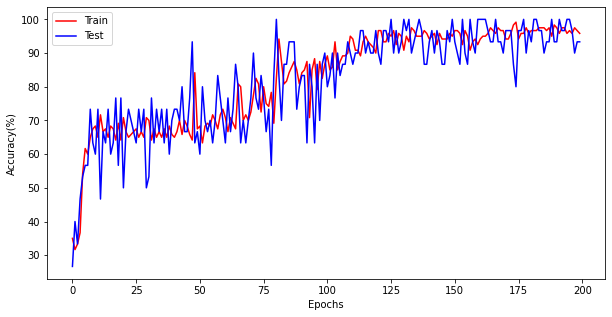

In [ ]:
fig = plt.figure(figsize=(10,5))

plt.plot(trainAcc,'r-')
plt.plot(testAcc,'b-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy(%)')
plt.legend(['Train','Test'])
plt.show()

The experiment:

In [ ]:
trainSetSizes = np.linspace(.2,.95,10)

allTrainAcc = np.zeros((len(trainSetSizes),numepochs))
allTestAcc = np.zeros((len(trainSetSizes),numepochs))

for i in range(len(trainSetSizes)):
  ANNiris,lossfun,optimizer = createANewModel() 
  trainAcc,testAcc = trainTheModel(trainSetSizes[i])

  allTrainAcc[i,:] = trainAcc
  allTestAcc[i,:] = testAcc

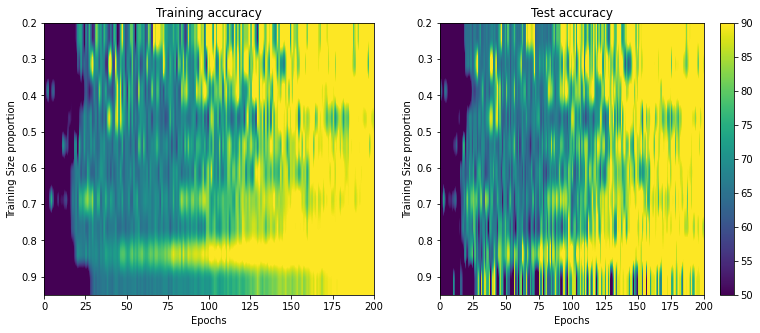

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(13,5))

ax[0].imshow(allTrainAcc, aspect='auto',vmin=50,vmax=90, extent=[0,numepochs,trainSetSizes[-1],trainSetSizes[0]])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Training Size proportion')
ax[0].set_title('Training accuracy')

p = ax[1].imshow(allTestAcc, aspect='auto',vmin=50,vmax=90, extent=[0,numepochs,trainSetSizes[-1],trainSetSizes[0]])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training Size proportion')
ax[1].set_title('Test accuracy')
fig.colorbar(p,ax=ax[1])

plt.show()